<a href="https://colab.research.google.com/github/Sowmyamaakam/Singaporewikipedia_sentimentAnalyzer/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=fee0d8d590490a7982d56b5aca39e81f0b3502f1f0d549218a2d11870969efe4
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [3]:
# Step 1 & 2
import wikipedia
wiki_text = wikipedia.page("Singapore").content

In [4]:
# Step 3 - Clean text
import re
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'\[[0-9]*\]', '', text)  # remove reference numbers
    text = re.sub(r'[^A-Za-z. ]+', '', text)  # keep only letters and periods
    return text

In [5]:
import nltk
from nltk.tokenize import sent_tokenize
cleaned_text = clean_text(wiki_text)
# Step 4
sentences = sent_tokenize(cleaned_text)

In [6]:
from textblob import TextBlob
sentiments = [TextBlob(sentence).sentiment.polarity for sentence in sentences]

In [7]:
import pandas as pd
df = pd.DataFrame({'Sentence': sentences, 'Sentiment': sentiments})

In [8]:
df['Label'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(cleaned_text.lower())

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [11]:
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

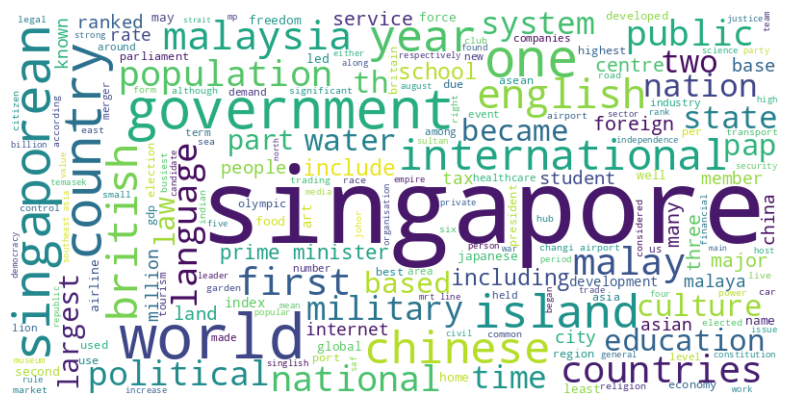

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
from collections import Counter
word_freq = Counter(filtered_words)
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(freq_df.head(10))

           Word  Frequency
0     singapore        284
96   singapores         53
73        world         45
217  government         45
11          one         41
122        also         38
66      british         32
4       country         31
190     english         31
42     malaysia         30


In [15]:
# Using only sentences and ignoring neutral
filtered_df = df[df['Label'] != 'neutral']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df['Sentence'])
y = filtered_df['Label'].map({'positive': 1, 'negative': 0})

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [18]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [29]:
from sklearn.metrics import classification_report, accuracy_score

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        76
           1       0.84      0.86      0.85        76

    accuracy                           0.85       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.85      0.85      0.85       152


Model: Decision Tree
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        76
           1       0.70      0.71      0.71        76

    accuracy                           0.70       152
   macro avg       0.70      0.70      0.70       152
weighted avg       0.70      0.70      0.70       152


Model: Random Forest
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.95      0.71      0.81        76
           1       0.77      0.96      0.85        76

    accuracy                           0.84       152
   macro av

In [23]:
def load_and_clean_wiki():
    text = wikipedia.page("Singapore").content
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]', '', text)
    text = re.sub(r'[^A-Za-z. ]+', '', text)
    sentences = sent_tokenize(text)
    sentiments = [TextBlob(s).sentiment.polarity for s in sentences]
    df = pd.DataFrame({'Sentence': sentences, 'Sentiment': sentiments})
    df['Label'] = df['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
    df = df[df['Label'] != 'neutral']
    return df

In [24]:
def train_all_models():
    df = load_and_clean_wiki()
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['Sentence'])
    y = df['Label'].map({'positive': 1, 'negative': 0})

    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Naive Bayes": MultinomialNB(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    trained = {} # initialize trained dictionary outside the loop
    for name, model in models.items():
        model.fit(X_train, y_train)  # Indent this line
        trained[name] = model      # Indent this line
    return trained, vectorizer

In [25]:
def preprocess_input(text):
    text = re.sub(r'[^A-Za-z ]+', '', text)
    return text.strip()

In [26]:
def generate_wordcloud(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text.lower())
    filtered = [w for w in words if w not in stop_words and w.isalpha()]
    wc = WordCloud(width=600, height=400, background_color='white').generate(' '.join(filtered))
    return wc

In [28]:
import pickle

# Assuming 'vectorizer' is your TF-IDF Vectorizer and 'model' is Logistic Regression model
# These should be defined before this block (as shown in the previous message)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save the Logistic Regression model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(models["Logistic Regression"], f)

print("TF-IDF Vectorizer & Sentiment Model saved successfully!")


TF-IDF Vectorizer & Sentiment Model saved successfully!
